In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\ayush\python\Learn-Pandas\Datasets\placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df.shape #100 rows and 4 cols, data of 100 students

(100, 4)

### Steps->
    #0 Preprocess + EDA + Feature selection
    #1 Extract input and output cols
    #2 Scale the values
    #3 Train Test Spilt
    #4 Train the model
    #5 Evaluate the Model/model selection
    #6 Deploy
    *EDA = Exploratory Data Analysis
    

## # PreProcessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.isnull().sum().sum() #finding the null value if exists

0

In [6]:
df.iloc[:,1:] #removing the 'Unamed col'
#this code means: i want all the rows but the col range should be 1-last

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


## # EDA

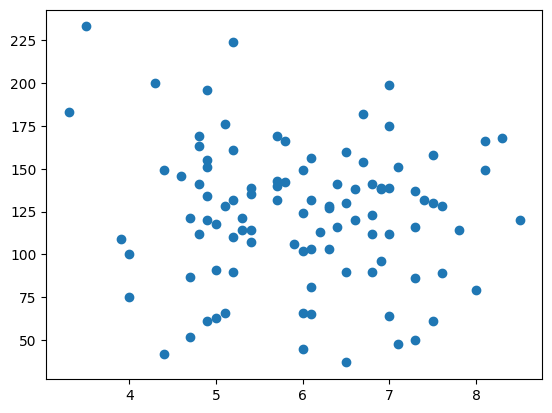

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['iq'])

In [9]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

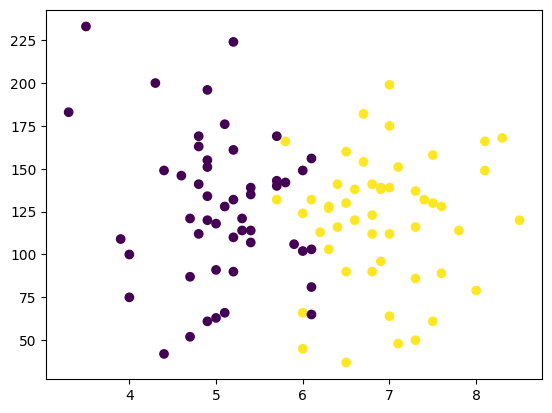

In [10]:
plt.scatter(df['cgpa'], df['iq'],c=df['placement'])

### #Train Test Split
    splitting the data into two parts randomly 
        i) training data (90 students)
        ii) testing data (10 students)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression 

In [17]:
clf = LogisticRegression()

### #Training The Model

In [18]:
clf.fit(X_train, Y_train)

LogisticRegression()

### #Evaluating the Model 

In [19]:
Y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(Y_test,Y_pred)

0.9

In [22]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

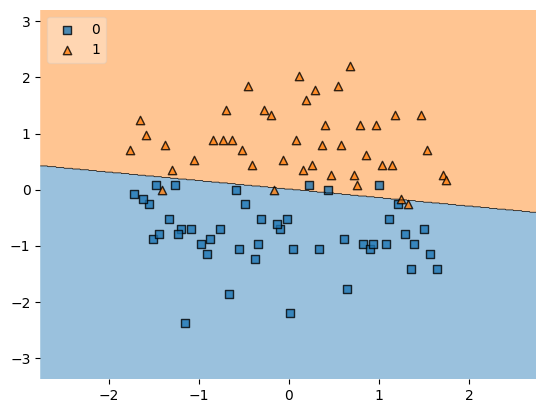

In [23]:
plot_decision_regions(X_train, Y_train.values, clf = clf, legend = 2)

In [24]:
import pickle

In [25]:
pickle.dump(clf,open('placement.pkl','wb'))